In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# First we start with cases
# we have 2 files 'casos' and 'casos_long'
# let's explore both

file_cases = "data/ccaa_covid19_casos.csv"

df = pd.read_csv(file_cases)
df.head()

,cod_ine,CCAA,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,...,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09
0,1,Andalucía,1,6,8,12,12,13,13,12,...,5818,6392,6972,7374,7869,8301,8581,8767,8997,9261
1,2,Aragón,0,1,1,0,0,0,0,1,...,2272,2491,2700,2889,3078,3232,3347,3449,3549,3685
2,3,Asturias,0,0,0,1,1,1,2,5,...,1236,1322,1384,1433,1522,1605,1646,1679,1705,1737
3,4,Baleares,1,1,2,2,2,2,5,6,...,1069,1131,1204,1257,1271,1293,1320,1369,1412,1448
4,5,Canarias,6,6,6,7,7,7,7,8,...,1262,1380,1444,1490,1564,1622,1649,1725,1762,1834


In the first one we have one row per community and one column per day starting on the 27th of February, let's give a look at the 'long' one:

In [5]:
file_cases_long = "https://raw.githubusercontent.com/datadista/datasets/master/COVID%2019/ccaa_covid19_casos_long.csv"

df_long = pd.read_csv(file_cases_long)
df_long.head()

,fecha,cod_ine,CCAA,total
0,2020-02-27,1,Andalucía,1
1,2020-02-28,1,Andalucía,6
2,2020-02-29,1,Andalucía,8
3,2020-03-01,1,Andalucía,12
4,2020-03-02,1,Andalucía,12


This one is better, but let's continue exploring the different files we have in the repository, we are going to open 'ccaa_covid19_datos_isciii.csv'

In [6]:
file_data = 'https://raw.githubusercontent.com/datadista/datasets/master/COVID%2019/ccaa_covid19_datos_isciii.csv'

df = pd.read_csv(file_data)
df.head()

,Fecha,cod_ine,CCAA,Casos,Hospitalizados,UCI,Fallecidos,Recuperados
0,2020-02-20,1,Andalucía,NaN,NaN,NaN,NaN,NaN
1,2020-02-20,2,Aragón,NaN,NaN,NaN,NaN,NaN
2,2020-02-20,3,Asturias,NaN,NaN,NaN,NaN,NaN
3,2020-02-20,4,Baleares,1.0,NaN,NaN,NaN,NaN
4,2020-02-20,5,Canarias,1.0,NaN,NaN,NaN,NaN


It seems that we found a file containing all the data we are looking for WONDERFUL! 

With this file we can start our exploratory data analysis, first of all, we have a lot of NaN in the file. I understand this NaN values as 0 people in these columns so let's fill it to avoid coming problems.

In [7]:
df = df.fillna(0)
df.describe()

,cod_ine,Casos,Hospitalizados,UCI,Fallecidos,Recuperados
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,10.000000,2148.101053,1079.882105,120.463158,188.041053,521.412632
std,5.480111,5479.399368,2918.612398,327.235758,649.902946,2148.473581
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,123.000000,33.500000,4.000000,2.000000,1.500000
75%,15.000000,1587.000000,643.000000,80.750000,77.750000,109.000000
max,19.000000,44783.000000,21530.000000,2582.000000,5972.000000,22414.000000


In [8]:
# Spain overall data
df_spain = df.groupby('Fecha').sum()
df_spain = df_spain.drop(columns=['cod_ine'])
df_spain.head()

,Casos,Hospitalizados,UCI,Fallecidos,Recuperados
Fecha,,,,,
2020-02-20,2.0,26.0,0.0,0.0,0.0
2020-02-21,2.0,30.0,1.0,0.0,0.0
2020-02-22,2.0,33.0,1.0,0.0,0.0
2020-02-23,2.0,38.0,2.0,0.0,0.0
2020-02-24,3.0,49.0,2.0,0.0,0.0


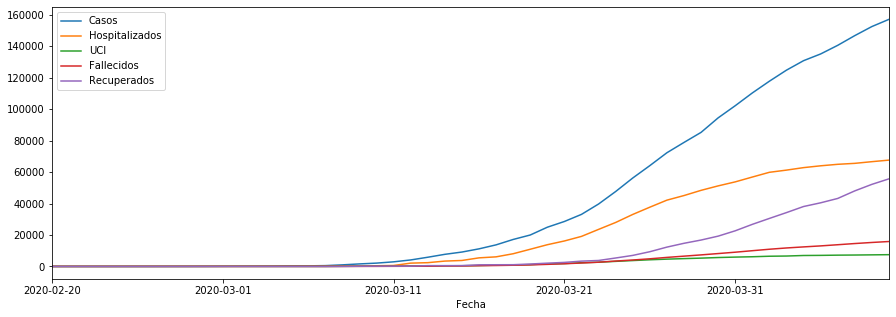

In [9]:
df_spain.plot(figsize=(15,5))

**TODO** Following the information we can see in the data repository README; for some communities for people in hospital (Hospitalizados) and people requiring ICU (UCI) date is acummulative

## DATA IS NOT TRUE BECAUSE SOME COMMUNITIES' DATA IS ONLY INPLACE NOT INCREMENT only concerning data about people in hospital and ICU

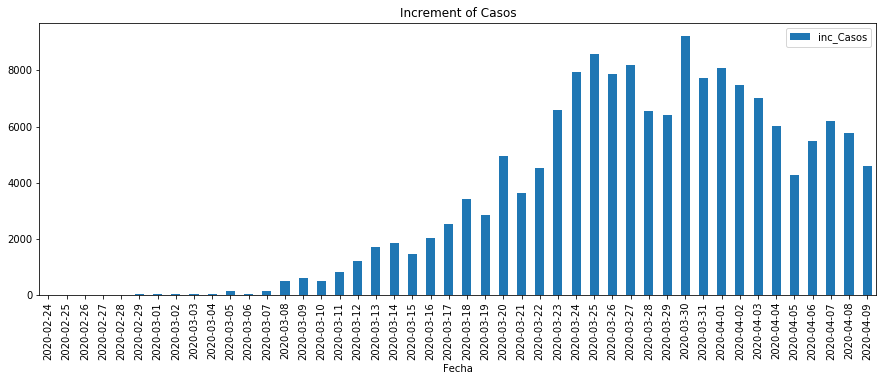

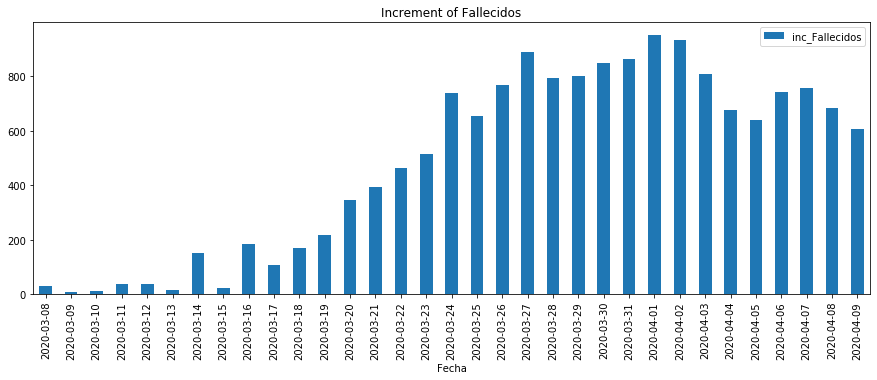

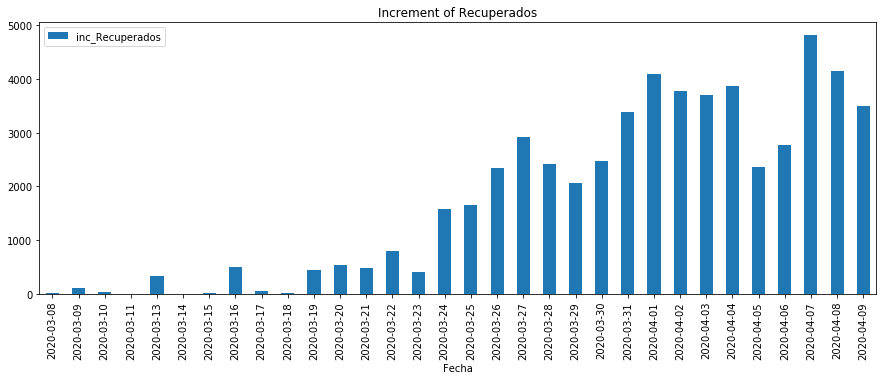

In [10]:
calculate_cols = ['Casos', 'Fallecidos', 'Recuperados']

for col in calculate_cols:
    df_spain['inc_{}'.format(col)] = df_spain['{}'.format(col)].diff()
    df_spain[df_spain['inc_{}'.format(col)] > 0].plot(figsize=(15,5), kind='bar', y='inc_{}'.format(col), title='Increment of {}'.format(col))


In [11]:
# Let see full dataframe plots
df = df.drop(columns='cod_ine')
df.head()

,Fecha,CCAA,Casos,Hospitalizados,UCI,Fallecidos,Recuperados
0,2020-02-20,Andalucía,0.0,0.0,0.0,0.0,0.0
1,2020-02-20,Aragón,0.0,0.0,0.0,0.0,0.0
2,2020-02-20,Asturias,0.0,0.0,0.0,0.0,0.0
3,2020-02-20,Baleares,1.0,0.0,0.0,0.0,0.0
4,2020-02-20,Canarias,1.0,0.0,0.0,0.0,0.0


In [12]:
df_grouped = df
df_grouped['Fecha'] = pd.to_datetime(df_grouped.Fecha)
df_grouped = df_grouped.groupby(['Fecha', 'CCAA']).sum()
df_grouped = df_grouped.drop(columns=['Hospitalizados', 'UCI', 'Fallecidos', 'Recuperados'])
df_grouped.head()

Casos
Fecha      CCAA                
2020-02-20 Andalucía        0.0
           Aragón           0.0
           Asturias         0.0
           Baleares         1.0
           C. Valenciana    0.0

In [70]:
df_g = df.groupby(['Fecha', 'CCAA']).agg({'Casos': sum})
g = df_g['Casos'].groupby(level=0, group_keys=False)
res = g.apply(lambda x: x.sort_values(ascending=False))
res.unstack()

CCAA,Andalucía,Aragón,Asturias,Baleares,C. Valenciana,Canarias,Cantabria,Castilla La Mancha,Castilla y León,Cataluña,Ceuta,Extremadura,Galicia,La Rioja,Madrid,Melilla,Murcia,Navarra,País Vasco
Fecha,,,,,,,,,,,,,,,,,,,
2020-02-20,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-21,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-22,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-23,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-24,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-25,0.0,0.0,0.0,1.0,1.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
2020-02-26,1.0,0.0,0.0,1.0,2.0,6.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
2020-02-27,6.0,0.0,0.0,1.0,8.0,6.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
2020-02-28,8.0,0.0,0.0,2.0,10.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,2.0


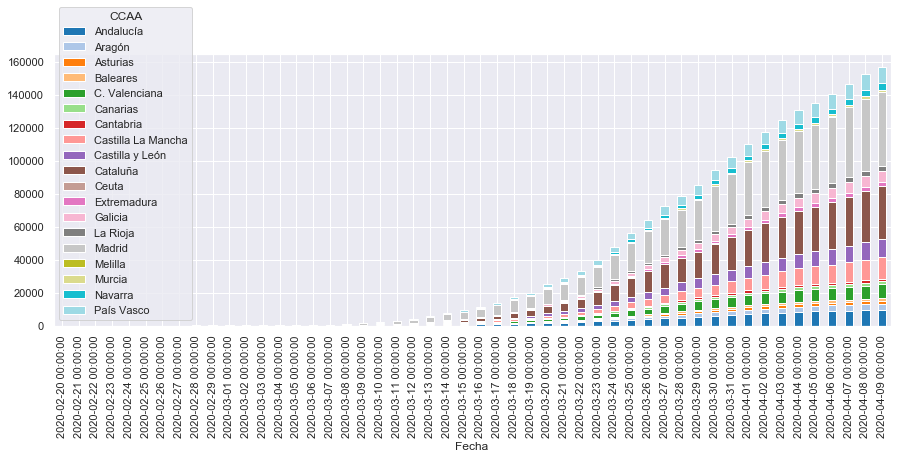

In [95]:
#res.unstack().plot(kind='bar', stacked=True, figsize=(15,5), cmap='tab20')
res.unstack().plot.bar(stacked=True, figsize=(15,5), cmap='tab20', sort_columns=True)

In [87]:
test = res.unstack()
test

CCAA,Andalucía,Aragón,Asturias,Baleares,C. Valenciana,Canarias,Cantabria,Castilla La Mancha,Castilla y León,Cataluña,Ceuta,Extremadura,Galicia,La Rioja,Madrid,Melilla,Murcia,Navarra,País Vasco
Fecha,,,,,,,,,,,,,,,,,,,
2020-02-20,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-21,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-22,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-23,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-24,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-25,0.0,0.0,0.0,1.0,1.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
2020-02-26,1.0,0.0,0.0,1.0,2.0,6.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
2020-02-27,6.0,0.0,0.0,1.0,8.0,6.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
2020-02-28,8.0,0.0,0.0,2.0,10.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,2.0


In [92]:
sns.set()
test = test.T
test.head()

Fecha,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,...,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09
CCAA,,,,,,,,,,,,,,,,,,,,,
Andalucía,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,8.0,12.0,...,6392.0,6972.0,7374.0,7869.0,8301.0,8581.0,8767.0,8997.0,9261.0,9510.0
Aragón,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2491.0,2700.0,2889.0,3078.0,3232.0,3347.0,3449.0,3549.0,3685.0,3831.0
Asturias,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1322.0,1384.0,1433.0,1522.0,1605.0,1646.0,1679.0,1705.0,1737.0,1799.0
Baleares,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,...,1131.0,1204.0,1257.0,1271.0,1293.0,1320.0,1369.0,1412.0,1448.0,1488.0
C. Valenciana,0.0,0.0,0.0,0.0,0.0,1.0,2.0,8.0,10.0,15.0,...,5922.0,6308.0,6624.0,6901.0,7184.0,7334.0,7443.0,7655.0,7964.0,8331.0
